In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from tqdm.notebook import tqdm
import urllib.request
from zipfile import ZipFile
# Setting plots parameters
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (18, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import warnings
warnings.filterwarnings("ignore")

In [2]:
# download data from UCI
# ref https://archive-beta.ics.uci.edu/ml/datasets/228
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
urllib.request.urlretrieve(url, 'sms_spam.zip')
# extract file
with ZipFile('sms_spam.zip', 'r') as zipObj:
   zipObj.extractall()

In [3]:
data_raw = pd.read_csv('SMSSpamCollection',sep='\t',names=['Category','Message'])
data_raw['Category']=data_raw['Category'].astype('category')
data_raw['Category_num'] = data_raw['Category'].cat.codes


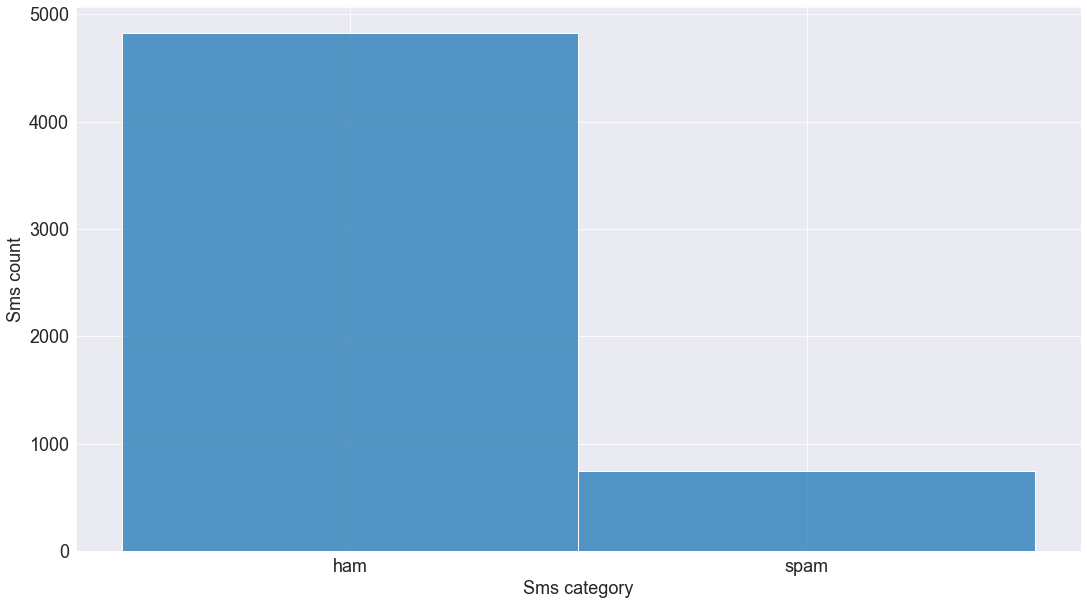

In [4]:
fig = sns.histplot(data_raw['Category']);
fig.set(ylabel = 'Sms count', xlabel = 'Sms category', Title='');

In [5]:
#extract the basic characters of the texts
lowercase ='abcdefghijklmnopqrstuvwxyz'
uppercase ='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
symbols='#!/\$%?&*()_+-^[]{|}><~;:.,»«@£="'+"'"
numbers='0123456789'

In [6]:
def lower_score(text):
    return sum([char_ in lowercase for char_ in text])/len(text)

def upper_score(text):
    return sum([char_ in uppercase for char_ in text])/len(text)

def symbol_score(text):
    return sum([char_ in symbols for char_ in text])/len(text)

def number_score(text):
    return sum([char_ in numbers for char_ in text])/len(text)

def space_score(text):
    return sum([char_ in ' ' for char_ in text])/len(text)

def length(text):
    return len(text)

In [7]:
data_raw['lower_score'] = data_raw['Message'].apply(lower_score)
data_raw['upper_score'] = data_raw['Message'].apply(upper_score)
data_raw['number_score'] = data_raw['Message'].apply(number_score)
data_raw['symbol_score'] = data_raw['Message'].apply(symbol_score)
data_raw['space_score'] = data_raw['Message'].apply(space_score)
data_raw['length'] = data_raw['Message'].apply(length)

In [8]:
data_raw.head(5)

Category                                            Message  Category_num  \
0      ham  Go until jurong point, crazy.. Available only ...             0   
1      ham                      Ok lar... Joking wif u oni...             0   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...             1   
3      ham  U dun say so early hor... U c already then say...             0   
4      ham  Nah I don't think he goes to usf, he lives aro...             0   

   lower_score  upper_score  number_score  symbol_score  space_score  length  
0     0.720721     0.027027       0.00000      0.081081     0.171171     111  
1     0.551724     0.068966       0.00000      0.206897     0.172414      29  
2     0.561290     0.064516       0.16129      0.038710     0.174194     155  
3     0.632653     0.040816       0.00000      0.122449     0.204082      49  
4     0.737705     0.032787       0.00000      0.032787     0.196721      61

In [9]:
# standardize all newly created features
std_g = np.std(data_raw['length'])
mean_g = np.mean(data_raw['length'])
data_raw['length_std'] = (data_raw['length']-mean_g)/std_g

std_l = np.std(data_raw['lower_score'])
mean_l = np.mean(data_raw['lower_score'])
data_raw['lower_score_std'] = (data_raw['lower_score']-mean_l)/std_l

std_c = np.std(data_raw['upper_score'])
mean_c = np.mean(data_raw['upper_score'])
data_raw['upper_score_std'] = (data_raw['upper_score']-mean_c)/std_c

std_n = np.std(data_raw['number_score'])
mean_n = np.mean(data_raw['number_score'])
data_raw['number_score_std'] = (data_raw['number_score']-mean_n)/std_n

std_s = np.std(data_raw['symbol_score'])
mean_s = np.mean(data_raw['symbol_score'])
data_raw['symbol_score_std'] = (data_raw['symbol_score']-mean_s)/std_s

std_p = np.std(data_raw['space_score'])
mean_p = np.mean(data_raw['space_score'])
data_raw['space_score_std'] = (data_raw['space_score']-mean_p)/std_p



In [10]:
data_raw.groupby('Category').mean()

Category_num  lower_score  upper_score  number_score  symbol_score  \
Category                                                                       
ham                  0     0.693129     0.058196      0.004241      0.061730   
spam                 1     0.563916     0.110913      0.116537      0.044052   

          space_score      length  length_std  lower_score_std  \
Category                                                         
ham          0.181630   71.482487   -0.150281         0.129469   
spam         0.164493  138.670683    0.970690        -0.836261   

          upper_score_std  number_score_std  symbol_score_std  space_score_std  
Category                                                                        
ham             -0.064744         -0.304418          0.040955         0.065530  
spam             0.418195          1.966286         -0.264537        -0.423267

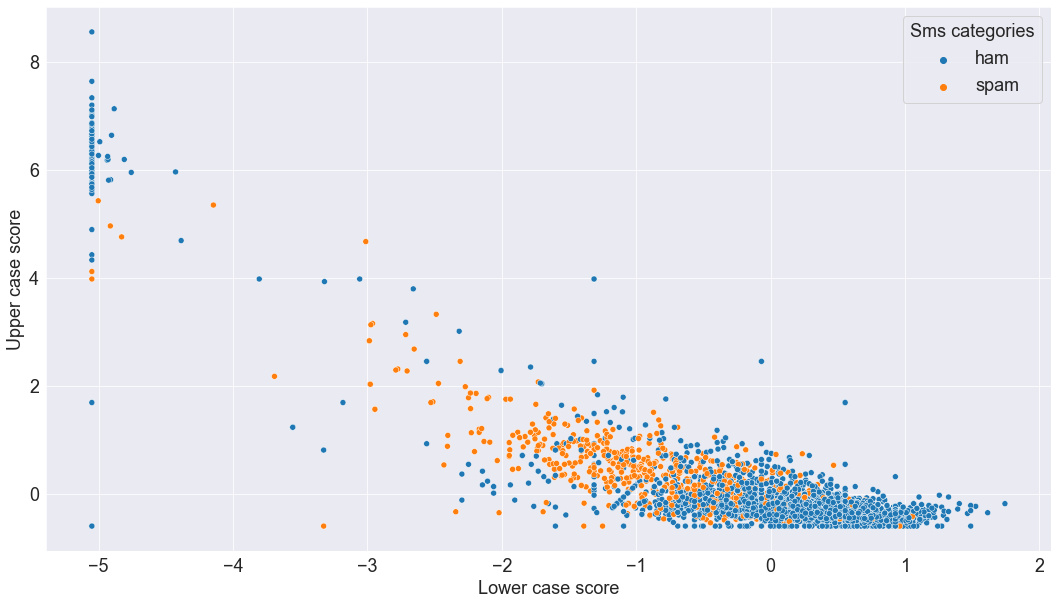

In [11]:
fig = sns.scatterplot(x='lower_score_std',y='upper_score_std',hue='Category',data=data_raw);
fig.set(ylabel = 'Upper case score', xlabel = 'Lower case score', Title='');
fig.legend(title='Sms categories');

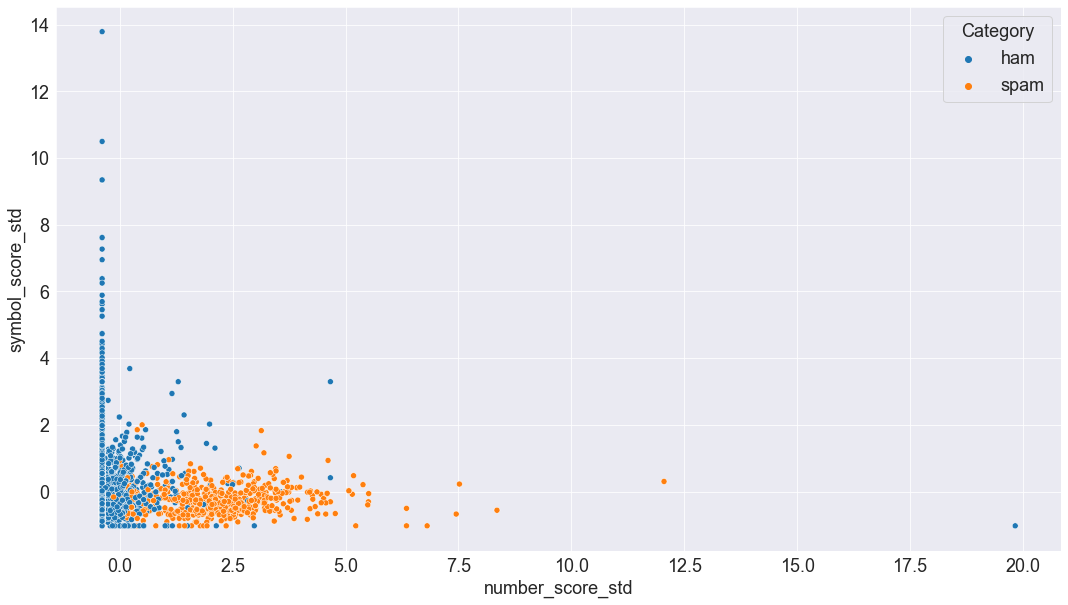

In [12]:
sns.scatterplot(x='number_score_std',y='symbol_score_std',hue='Category',data=data_raw);
fig.set(ylabel = 'Symbols score', xlabel = 'Numbers score', Title='');
fig.legend(title='Sms categories');

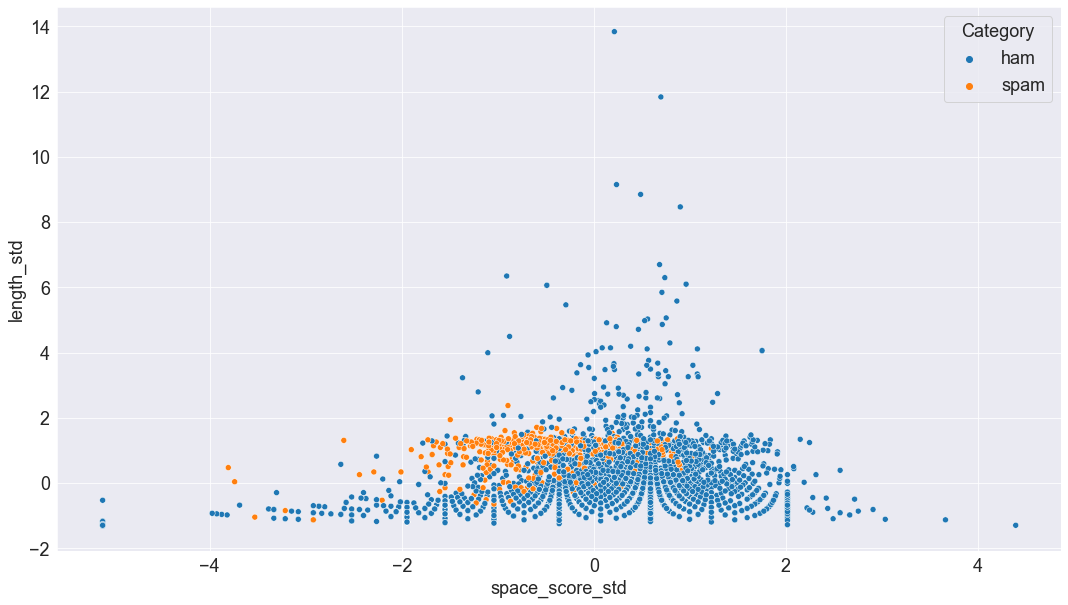

In [13]:
sns.scatterplot(x='space_score_std',y='length_std',hue='Category',data=data_raw);
fig.set(ylabel = 'Length score', xlabel = 'Space score', Title='');
fig.legend(title='Sms categories');

In [28]:
# let's try some ML classification / regression techniques
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_raw,test_size=0.2)

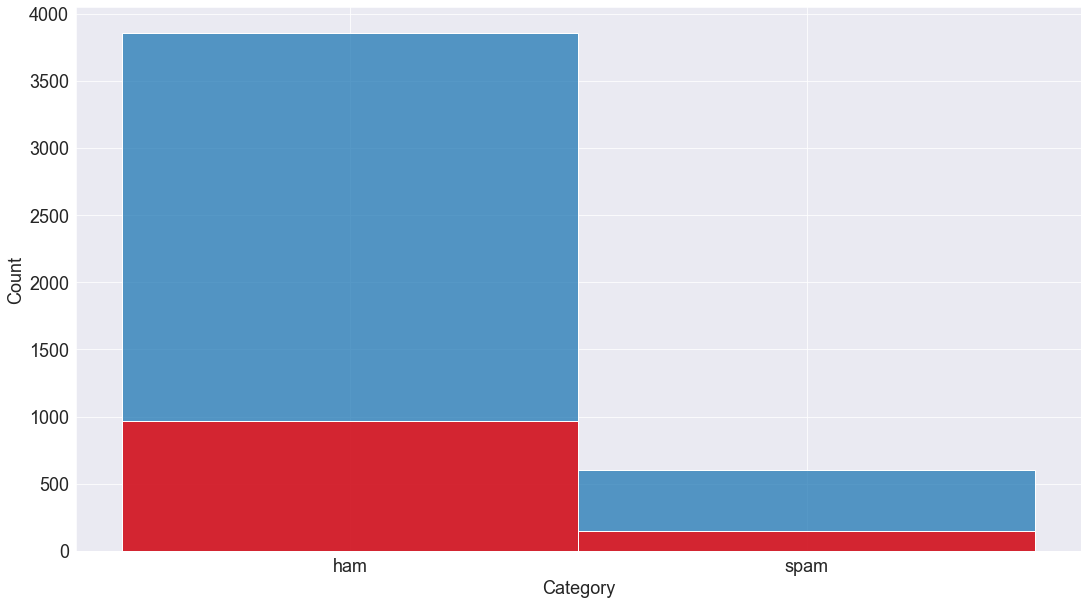

In [29]:
# check if the split is well distributed
fig = sns.histplot(train_data['Category'],multiple="stack");
sns.histplot(test_data['Category'],color='r',multiple="stack");


In [30]:
# create train and test sets
in_cols = ['lower_score_std','upper_score_std','number_score_std','symbol_score_std','length_std','space_score_std']

train_features =train_data[in_cols]
train_labels = train_data['Category_num']

test_features =test_data[in_cols]
test_labels = test_data['Category_num']


In [31]:
# logistic regression 
from sklearn.linear_model import LogisticRegression 
logistic_classifier = LogisticRegression(max_iter=100)
logistic_classifier.fit(train_features,train_labels)

LogisticRegression()

In [32]:
print('Accuracy on training set')
logistic_classifier.score(train_features,train_labels)

Accuracy on training set


0.9641014135068432

In [33]:
print('Accuracy on testing set')
logistic_classifier.score(test_features,test_labels)

Accuracy on testing set


0.9721973094170404

In [34]:
print('Classifier coefficients (weights)')
logistic_classifier.coef_

Classifier coefficients (weights)


array([[ 0.28977153,  0.31541305,  2.77641722, -0.92742381,  0.76779891,
        -0.63358819]])

In [44]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# testing different numbers of neighbors
results=[]
for n_neighbors in range(1,21):
    KNN_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    KNN_classifier.fit(train_features,train_labels)
    print('Accuracy on testing set for n_neighbors = '+str(n_neighbors))
    acc_test = KNN_classifier.score(test_features,test_labels)
    print(acc_test)
    results.append([n_neighbors,acc_test])

Accuracy on testing set for n_neighbors = 1
0.9811659192825112
Accuracy on testing set for n_neighbors = 2
0.9865470852017937
Accuracy on testing set for n_neighbors = 3
0.9847533632286996
Accuracy on testing set for n_neighbors = 4
0.9838565022421525
Accuracy on testing set for n_neighbors = 5
0.9829596412556054
Accuracy on testing set for n_neighbors = 6
0.9847533632286996
Accuracy on testing set for n_neighbors = 7
0.9829596412556054
Accuracy on testing set for n_neighbors = 8
0.9829596412556054
Accuracy on testing set for n_neighbors = 9
0.9829596412556054
Accuracy on testing set for n_neighbors = 10
0.9838565022421525
Accuracy on testing set for n_neighbors = 11
0.9820627802690582
Accuracy on testing set for n_neighbors = 12
0.9820627802690582
Accuracy on testing set for n_neighbors = 13
0.9811659192825112
Accuracy on testing set for n_neighbors = 14
0.9820627802690582
Accuracy on testing set for n_neighbors = 15
0.9820627802690582
Accuracy on testing set for n_neighbors = 16
0.98

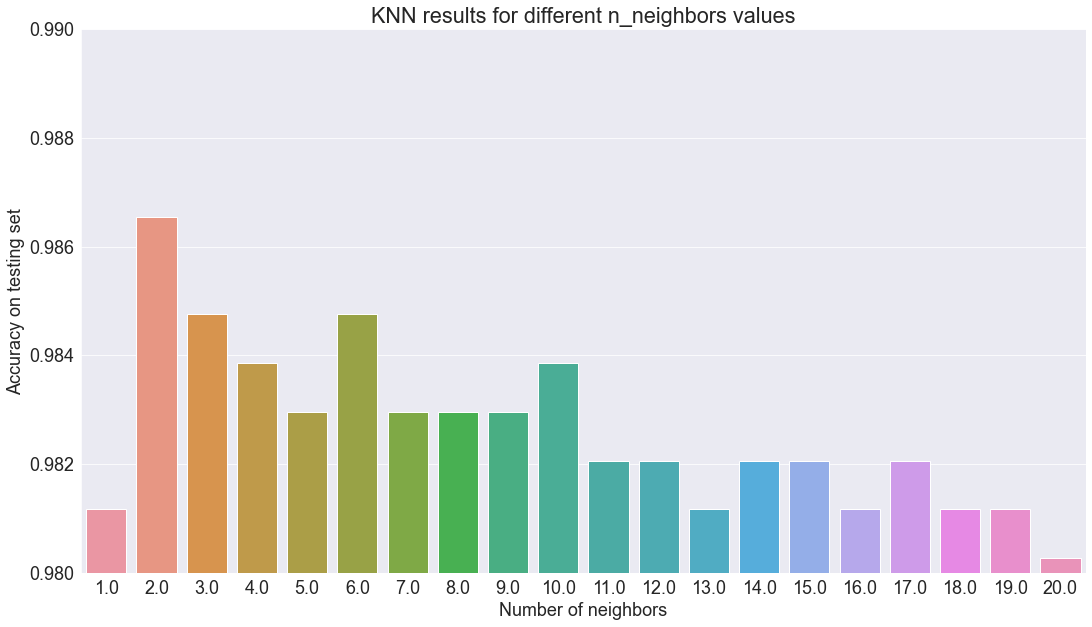

In [45]:
results = np.array(results)
fig = sns.barplot(x=results[:,0], y=results[:,1]);
fig.set(ylabel = 'Accuracy on testing set', xlabel = 'Number of neighbors', Title='KNN results for different n_neighbors values');
fig.set(ylim=(0.98,0.99));

In [46]:
# naive bayes
from sklearn.naive_bayes import GaussianNB 
NaiveBayes_classifier = GaussianNB()
NaiveBayes_classifier.fit(train_features,train_labels)

GaussianNB()

In [52]:
print('Accuracy on training set')
NaiveBayes_classifier.score(train_features,train_labels)

Accuracy on training set


0.9721785954678035

In [53]:
print('Accuracy on testing set')
NaiveBayes_classifier.score(test_features,test_labels)

Accuracy on testing set


0.9766816143497757

In [55]:
# decision trees
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(train_features,train_labels)

DecisionTreeClassifier()

In [56]:
print('Accuracy on training set')
DT_classifier.score(train_features,train_labels)

Accuracy on training set


0.9997756338344178

In [57]:
print('Accuracy on testing set')
DT_classifier.score(test_features,test_labels)

Accuracy on testing set


0.9748878923766816

In [58]:
# a basic feed forward neural network using Keras/Tensorflow

# building the net using keras
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(5 , activation='relu' , input_dim=6))
network.add(layers.Dense(5 , activation='relu'))
network.add(layers.Dense(1,activation='sigmoid'))

network.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc','Precision','Recall'])

# Training 
result = network.fit(train_features,train_labels,epochs = 15,verbose=2,validation_data= (test_features,test_labels))

Epoch 1/15
140/140 - 2s - loss: 0.6246 - acc: 0.8598 - precision: 0.2391 - recall: 0.0183 - val_loss: 0.5235 - val_acc: 0.8691 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
140/140 - 1s - loss: 0.3984 - acc: 0.8652 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2821 - val_acc: 0.8691 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
140/140 - 1s - loss: 0.2185 - acc: 0.8889 - precision: 0.9818 - recall: 0.1797 - val_loss: 0.1675 - val_acc: 0.9614 - val_precision: 0.9402 - val_recall: 0.7534
Epoch 4/15
140/140 - 1s - loss: 0.1425 - acc: 0.9666 - precision: 0.9397 - recall: 0.8037 - val_loss: 0.1155 - val_acc: 0.9740 - val_precision: 0.9091 - val_recall: 0.8904
Epoch 5/15
140/140 - 1s - loss: 0.1063 - acc: 0.9726 - precision: 0.9224 - recall: 0.8702 - val_loss: 0.0908 - val_acc: 0.9767 - val_precision: 0.9167 - val_recall: 0.9041
Epoch 6/15
140/140 - 1s - loss: 0.0909 - acc: 0.9733 - precision: 0.9213 - recall: 0.8769 - val_loss: 0.0800 - val_a

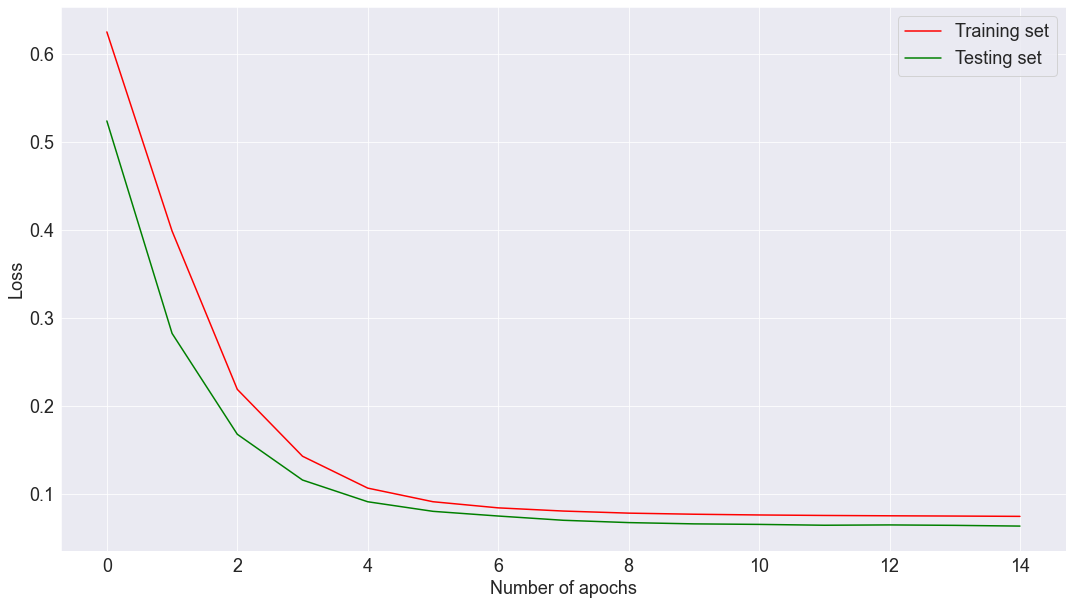

In [68]:
x = np.arange(len(result.history['loss']))
y1 = result.history['loss']
y2 = result.history['val_loss']
plt.plot(x,y1,'r');
plt.plot(x,y2,'g');
plt.xlabel('Number of apochs');
plt.ylabel('Loss');
plt.legend(['Training set','Testing set']);

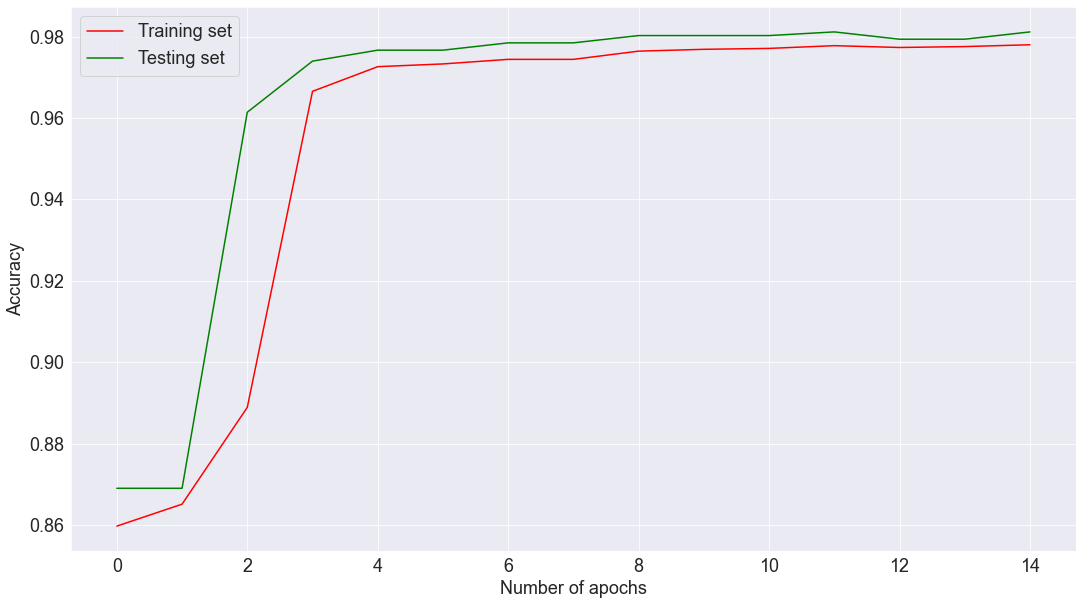

In [69]:
y1 = result.history['acc']
y2 = result.history['val_acc']
plt.plot(x,y1,'r');
plt.plot(x,y2,'g');
plt.xlabel('Number of apochs');
plt.ylabel('Accuracy');
plt.legend(['Training set','Testing set']);

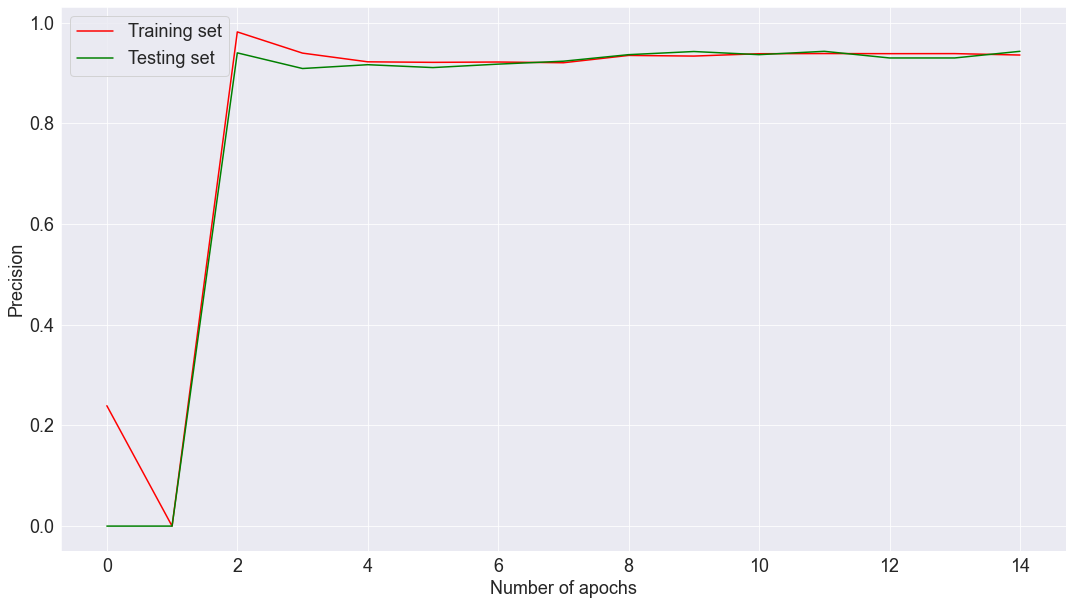

In [70]:
x = np.arange(len(result.history['loss']))
y1 = result.history['precision']
y2 = result.history['val_precision']
plt.plot(x,y1,'r');
plt.plot(x,y2,'g');
plt.xlabel('Number of apochs');
plt.ylabel('Precision');
plt.legend(['Training set','Testing set']);

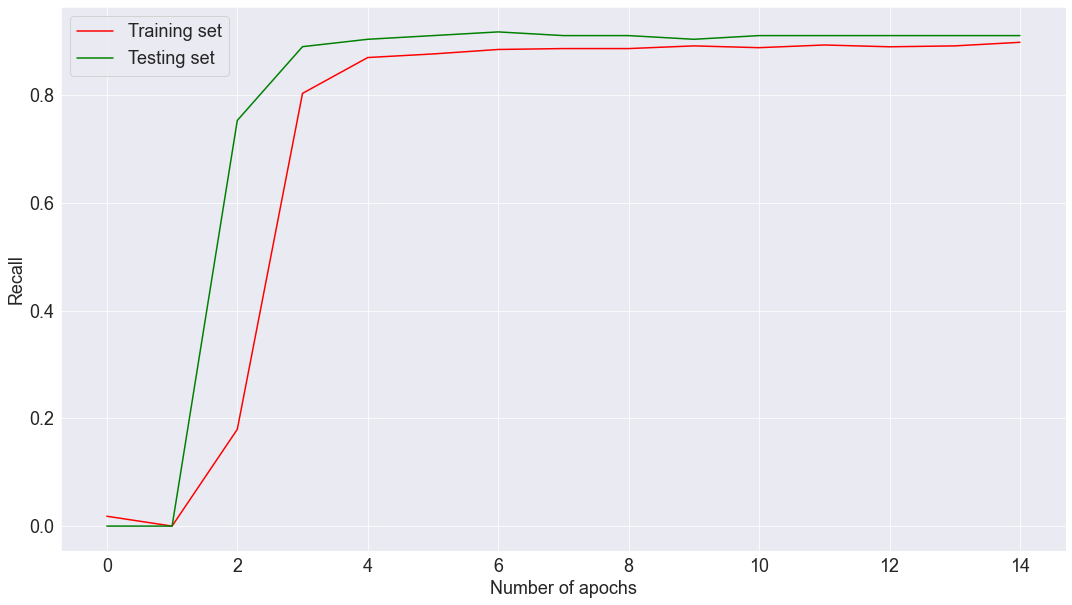

In [71]:
x = np.arange(len(result.history['loss']))
y1 = result.history['recall']
y2 = result.history['val_recall']
plt.plot(x,y1,'r');
plt.plot(x,y2,'g');
plt.xlabel('Number of apochs');
plt.ylabel('Recall');
plt.legend(['Training set','Testing set']);